In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, precision_score, recall_score
from IPython.display import Image

According to the VETA results three instruments were selected:
1. Pangolin
2. SpliceAI
4. SPiP

## Threshold selection

To select optimal thresholds we analize two datasets that contain:
- 54 variants that were experimantally confirmed
- all 103 variants

**ROC curve for 54 variants**

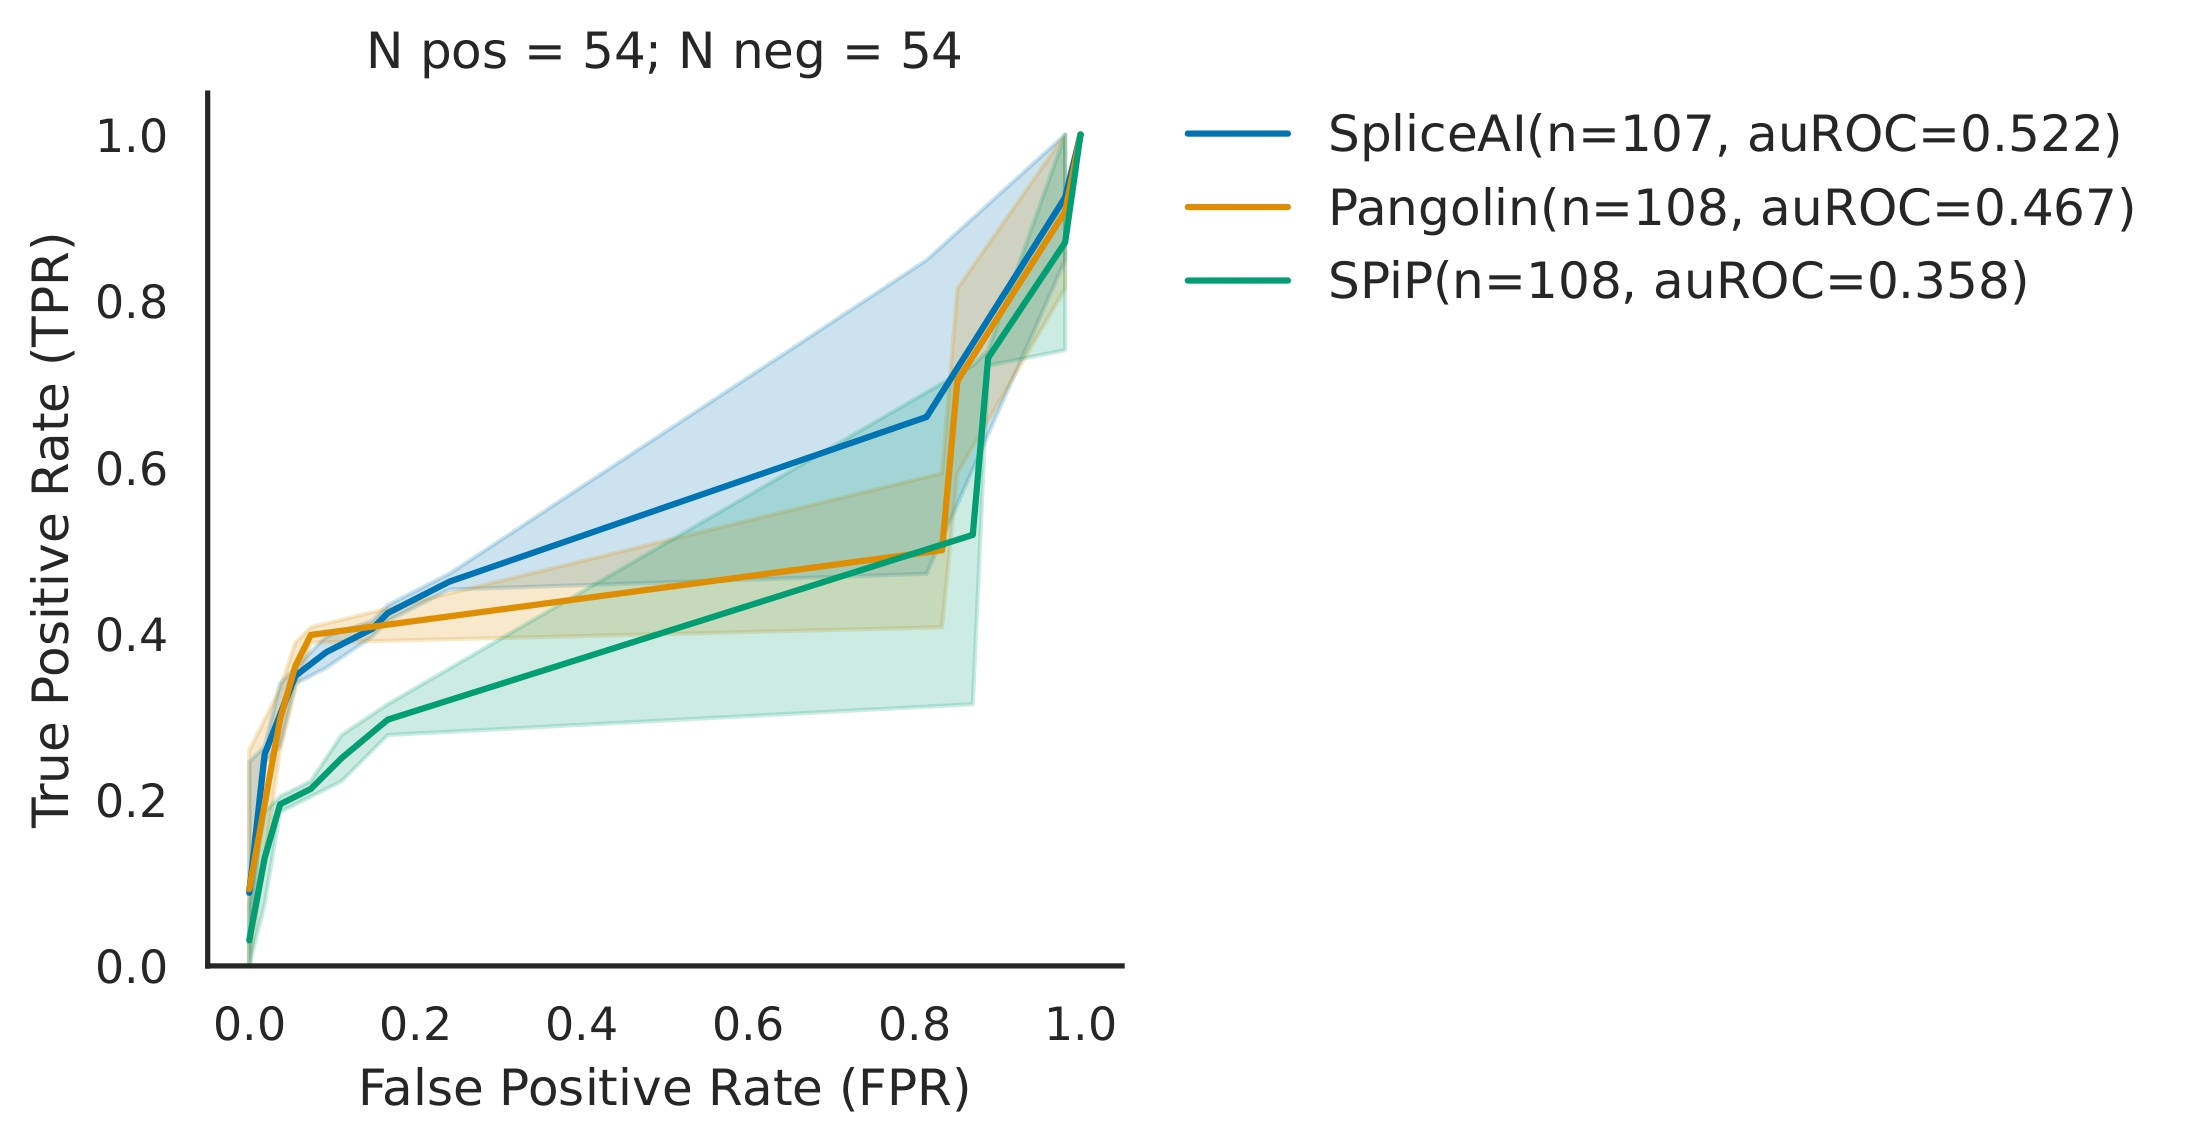

In [2]:
Image(filename='../figures/ROC_54_Pang_SAI_SPiP.jpg') 

**ROC curve for 103 variants**

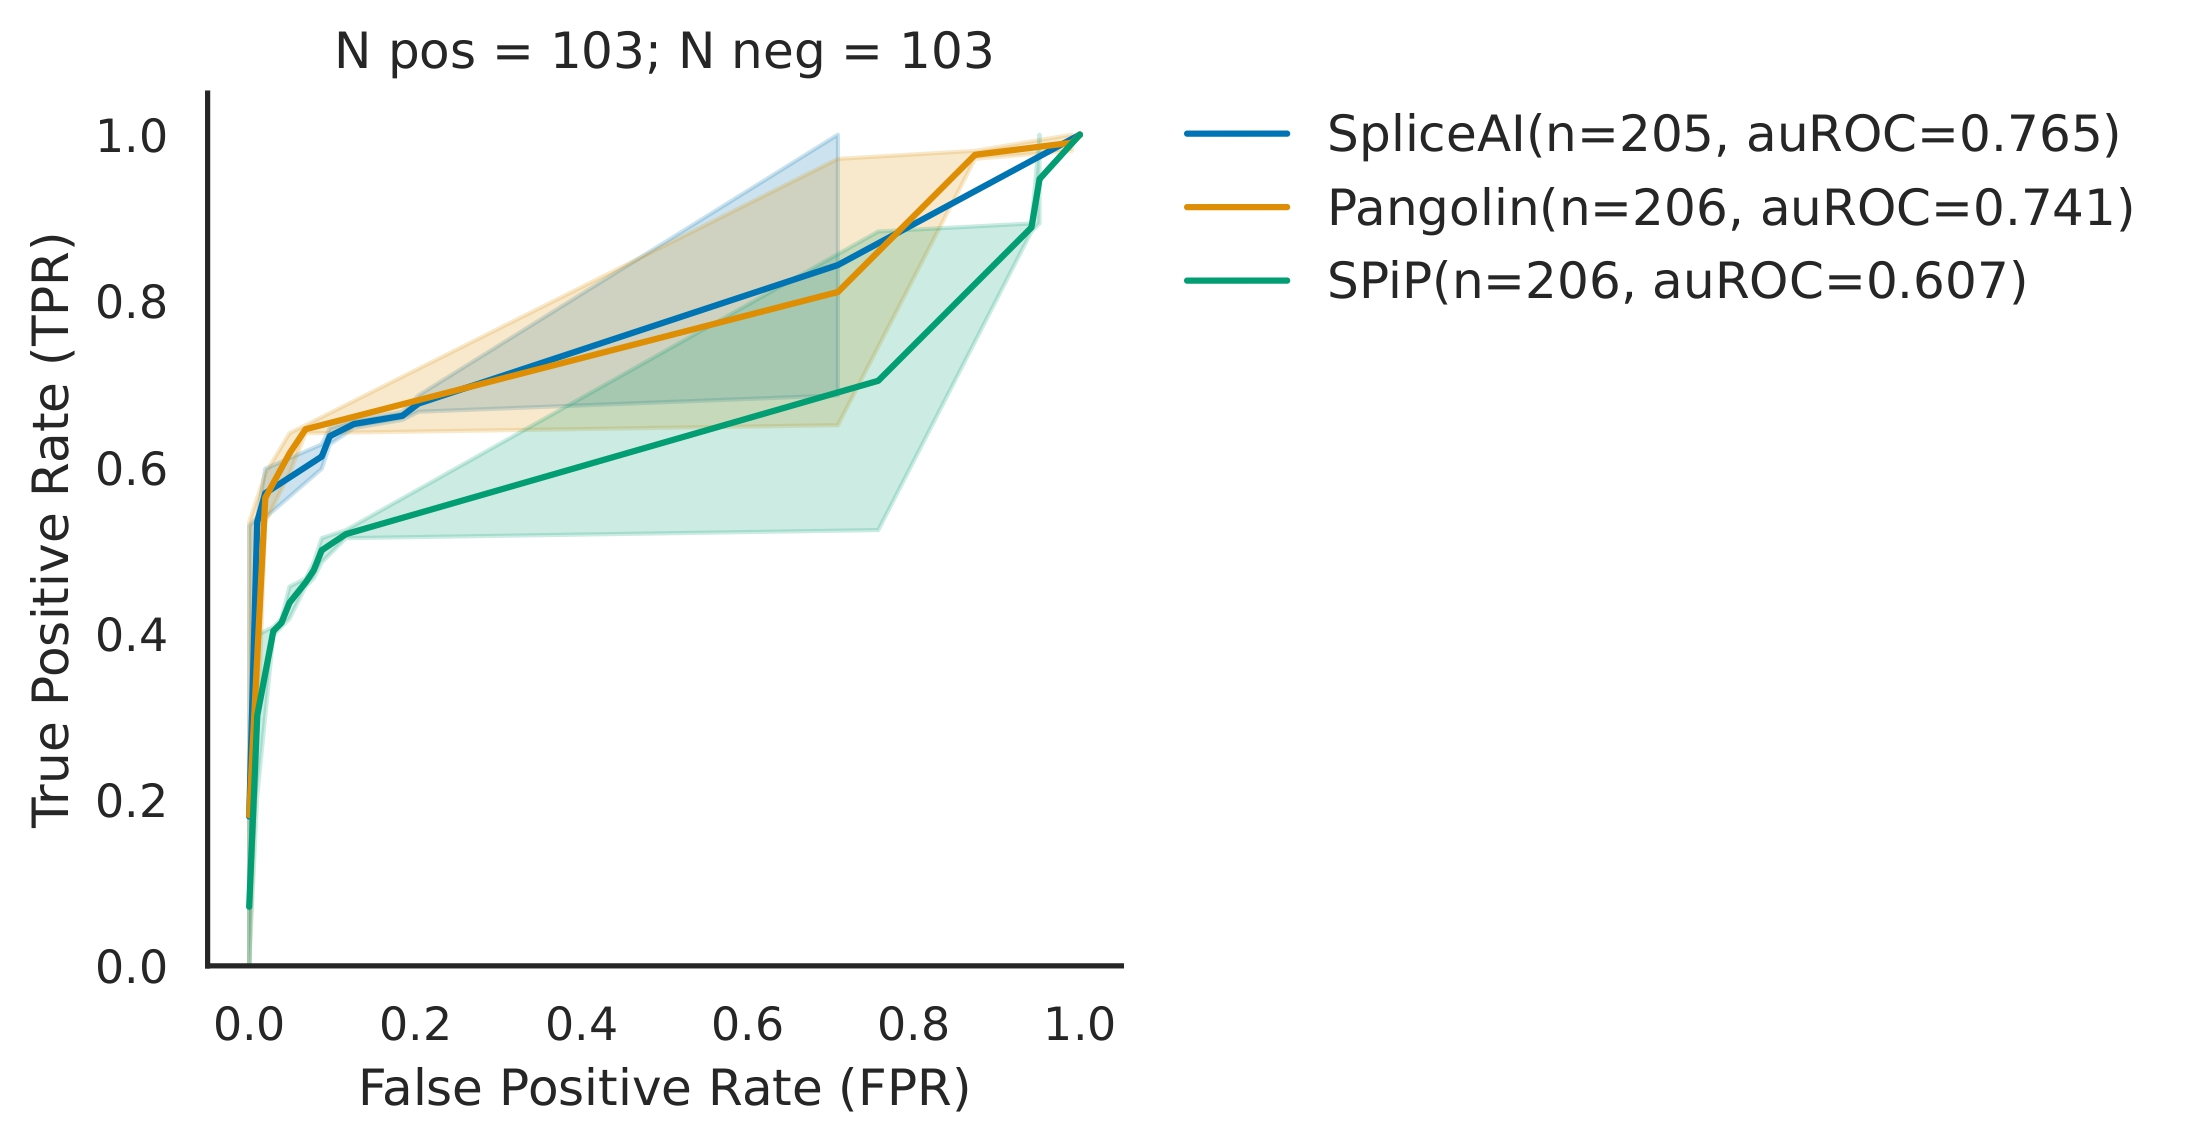

In [4]:
Image(filename='../figures/ROC_103_Pang_SAI_SPiP.jpg') 

### Conventional threshold

Standard thresholds that are provided by developers:
- Pangolin: 0.2
- SpliceAI: 0.2
- SPiP: 0.452

In [4]:
conv_res_54 = pd.read_csv('final/54/veta_output/tools_benchmark/all_types/results_tsv/preds_all_types_all_class.tsv', 
                     sep='\t')

In [5]:
conv_res_54.head()

,chr,pos,ref,alt,SYMBOL,CADD_v1.5_prediction,SQUIRLS_prediction,MaxEntScan_prediction,SpliceAI_prediction,CI-SpliceAI_prediction,Pangolin_prediction,SPiP_prediction,PDIVAS_prediction,label
0,1,68435602,T,G,RPE65,False,False,False,False,False,False,False,False,False
1,1,93997549,G,A,ABCA4,False,False,False,False,False,False,False,NaN,False
2,1,94001452,C,T,ABCA4,False,False,False,False,False,False,False,NaN,False
3,1,94002381,C,T,ABCA4,False,False,False,False,False,False,False,NaN,False
4,1,94002484,A,G,ABCA4,False,False,False,False,False,False,False,NaN,False


In [6]:
conv_res_103 = pd.read_csv('final/103/veta_output/tools_benchmark/all_types/results_tsv/preds_all_types_all_class.tsv', 
                     sep='\t')

In [7]:
conv_res_103.head()

,chr,pos,ref,alt,SYMBOL,CADD_v1.5_prediction,SQUIRLS_prediction,MaxEntScan_prediction,SpliceAI_prediction,CI-SpliceAI_prediction,Pangolin_prediction,SPiP_prediction,PDIVAS_prediction,label
0,1,68435602,T,G,RPE65,False,False,False,False,False,False,False,False,False
1,1,68446426,A,C,RPE65,False,False,False,False,False,False,False,NaN,False
2,1,68446467,G,A,RPE65,False,False,False,False,False,False,False,NaN,False
3,1,68448987,A,G,RPE65,False,False,False,False,False,False,False,NaN,False
4,1,93997549,G,A,ABCA4,False,False,False,False,False,False,False,NaN,False


Select tools of the main interest

In [8]:
conv_res_54.columns

Index(['chr', 'pos', 'ref', 'alt', 'SYMBOL', 'CADD_v1.5_prediction',
       'SQUIRLS_prediction', 'MaxEntScan_prediction', 'SpliceAI_prediction',
       'CI-SpliceAI_prediction', 'Pangolin_prediction', 'SPiP_prediction',
       'PDIVAS_prediction', 'label'],
      dtype='object')

In [9]:
features = ['chr', 'pos', 'ref', 'alt', 'SYMBOL', 'SpliceAI_prediction', 'Pangolin_prediction', 'SPiP_prediction', 'label']
conv_res_54 = conv_res_54[features]
conv_res_103 = conv_res_103[features]

In [10]:
conv_res_54['SpliceAI_prediction'] = pd.to_numeric(conv_res_54['SpliceAI_prediction'])
conv_res_54['Pangolin_prediction'] = pd.to_numeric(conv_res_54['Pangolin_prediction'])
conv_res_54['SPiP_prediction'] = pd.to_numeric(conv_res_54['SPiP_prediction'])
conv_res_54['label'] = pd.to_numeric(conv_res_54['label'])

conv_res_103['SpliceAI_prediction'] = pd.to_numeric(conv_res_103['SpliceAI_prediction'])
conv_res_103['Pangolin_prediction'] = pd.to_numeric(conv_res_103['Pangolin_prediction'])
conv_res_103['SPiP_prediction'] = pd.to_numeric(conv_res_103['SPiP_prediction'])
conv_res_103['label'] = pd.to_numeric(conv_res_103['label'])

Impute one NaN value with 0 in SpliceAI column

In [11]:
conv_res_54['SpliceAI_prediction'] = conv_res_54['SpliceAI_prediction'].fillna(0)
conv_res_103['SpliceAI_prediction'] = conv_res_103['SpliceAI_prediction'].fillna(0)

Analyze metrics

**F1 score**

In [12]:
print('The f1 score in the dataset with 54 variants')

pang_f1_score_54 = f1_score(conv_res_54['label'], conv_res_54['Pangolin_prediction'])
print(f'Pangolin: {pang_f1_score_54}')

sai_f1_score_54 = f1_score(conv_res_54['label'], conv_res_54['SpliceAI_prediction'])
print(f'SpliceAI: {sai_f1_score_54}')

spip_f1_score_54 = f1_score(conv_res_54['label'], conv_res_54['SPiP_prediction'])
print(f'SPiP: {spip_f1_score_54}')

print('')

print('The f1 score in the dataset with 103 variants')

pang_f1_score_103 = f1_score(conv_res_103['label'], conv_res_103['Pangolin_prediction'])
print(f'Pangolin: {pang_f1_score_103}')

sai_f1_score_103 = f1_score(conv_res_103['label'], conv_res_103['SpliceAI_prediction'])
print(f'SpliceAI: {sai_f1_score_103}')

spip_f1_score_103 = f1_score(conv_res_103['label'], conv_res_103['SPiP_prediction'])
print(f'SPiP: {spip_f1_score_103}')

The f1 score in the dataset with 54 variants
Pangolin: 0.36363636363636365
SpliceAI: 0.36363636363636365
SPiP: 0.07142857142857142

The f1 score in the dataset with 103 variants
Pangolin: 0.6623376623376623
SpliceAI: 0.6623376623376623
SPiP: 0.11009174311926606


**Precision**

In [13]:
print('Precision in the dataset with 54 variants')

pang_pr_score_54 = precision_score(conv_res_54['label'], conv_res_54['Pangolin_prediction'])
print(f'Pangolin: {pang_pr_score_54}')

sai_pr_score_54 = precision_score(conv_res_54['label'], conv_res_54['SpliceAI_prediction'])
print(f'SpliceAI: {sai_pr_score_54}')

spip_pr_score_54 = precision_score(conv_res_54['label'], conv_res_54['SPiP_prediction'])
print(f'SPiP: {spip_pr_score_54}')

print('')

print('Precision in the dataset with 103 variants')

pang_pr_score_103 = precision_score(conv_res_103['label'], conv_res_103['Pangolin_prediction'])
print(f'Pangolin: {pang_pr_score_103}')

sai_pr_score_103 = precision_score(conv_res_103['label'], conv_res_103['SpliceAI_prediction'])
print(f'SpliceAI: {sai_pr_score_103}')

spip_pr_score_103 = precision_score(conv_res_103['label'], conv_res_103['SPiP_prediction'])
print(f'SPiP: {spip_pr_score_103}')

Precision in the dataset with 54 variants
Pangolin: 1.0
SpliceAI: 1.0
SPiP: 1.0

Precision in the dataset with 103 variants
Pangolin: 1.0
SpliceAI: 1.0
SPiP: 1.0


**Recall**

In [14]:
print('Recall in the dataset with 54 variants')

pang_rec_score_54 = recall_score(conv_res_54['label'], conv_res_54['Pangolin_prediction'])
print(f'Pangolin: {pang_rec_score_54}')

sai_rec_score_54 = recall_score(conv_res_54['label'], conv_res_54['SpliceAI_prediction'])
print(f'SpliceAI: {sai_rec_score_54}')

spip_rec_score_54 = recall_score(conv_res_54['label'], conv_res_54['SPiP_prediction'])
print(f'SPiP: {spip_rec_score_54}')

print('')

print('Recall in the dataset with 103 variants')

pang_rec_score_103 = recall_score(conv_res_103['label'], conv_res_103['Pangolin_prediction'])
print(f'Pangolin: {pang_rec_score_103}')

sai_rec_score_103 = recall_score(conv_res_103['label'], conv_res_103['SpliceAI_prediction'])
print(f'SpliceAI: {sai_rec_score_103}')

spip_rec_score_103 = recall_score(conv_res_103['label'], conv_res_103['SPiP_prediction'])
print(f'SPiP: {spip_rec_score_103}')

Recall in the dataset with 54 variants
Pangolin: 0.2222222222222222
SpliceAI: 0.2222222222222222
SPiP: 0.037037037037037035

Recall in the dataset with 103 variants
Pangolin: 0.49514563106796117
SpliceAI: 0.49514563106796117
SPiP: 0.05825242718446602


Try to find optimun threshold to increase f1 score

### Search for optimum thresholds

Work with raw scores

In [15]:
res_54 = pd.read_csv('final/54/veta_output/tools_benchmark/all_types/results_tsv/preds_all_types_all_scores.tsv', 
                     sep='\t')

In [16]:
res_54.head()

,chr,pos,ref,alt,SYMBOL,index,chr.1,pos.1,ref.1,alt.1,...,Pangolin,SQUIRLS,SpliceAI,SPiP,MaxEntScan,location,intron_bin,intron_offset,which_ss,outcome
0,1,68435602,T,G,RPE65,1_68435602_ENST00000262340.6:c.1128+2585A>C_G,1,68435602,T,G,...,0.00,0.0071,0.00,0.000,0.091,intronic,1000+,2585.0,unclear,Benign
1,1,93997549,G,A,ABCA4,1_93997549_ENST00000370225.4:c.6729+312C>T_A,1,93997549,G,A,...,0.00,0.0084,0.00,0.000,1.635,intronic,201-500,312.0,donor,Benign
2,1,94001452,C,T,ABCA4,1_94001452_ENST00000370225.4:c.6283-347G>A_T,1,94001452,C,T,...,0.00,0.0062,0.00,0.000,0.915,intronic,201-500,347.0,acceptor,Benign
3,1,94002381,C,T,ABCA4,1_94002381_ENST00000370225.4:c.6148-389G>A_T,1,94002381,C,T,...,0.03,0.0060,0.02,0.002,0.131,intronic,201-500,389.0,acceptor,Benign
4,1,94002484,A,G,ABCA4,1_94002484_ENST00000370225.4:c.6148-492T>C_G,1,94002484,A,G,...,0.13,0.0063,0.14,0.000,0.432,intronic,201-500,492.0,acceptor,Benign


In [17]:
res_103 = pd.read_csv('final/103/veta_output/tools_benchmark/all_types/results_tsv/preds_all_types_all_scores.tsv', 
                     sep='\t')

In [18]:
res_103.head()

,chr,pos,ref,alt,SYMBOL,index,chr.1,pos.1,ref.1,alt.1,...,Pangolin,SQUIRLS,SpliceAI,SPiP,MaxEntScan,location,intron_bin,intron_offset,which_ss,outcome
0,1,68435602,T,G,RPE65,1_68435602_ENST00000262340.6:c.1128+2585A>C_G,1,68435602,T,G,...,0.0,0.0071,0.0,0.000,0.091,intronic,1000+,2585,unclear,Benign
1,1,68446426,A,C,RPE65,1_68446426_ENST00000262340.6:c.245+284T>G_C,1,68446426,A,C,...,0.0,0.0072,0.0,0.000,1.272,intronic,201-500,284,donor,Benign
2,1,68446467,G,A,RPE65,1_68446467_ENST00000262340.6:c.245+243C>T_A,1,68446467,G,A,...,0.0,0.0089,0.0,0.006,0.856,intronic,201-500,243,donor,Benign
3,1,68448987,A,G,RPE65,1_68448987_ENST00000262340.6:c.12-281T>C_G,1,68448987,A,G,...,0.0,0.0060,0.0,0.000,0.175,intronic,201-500,281,acceptor,Benign
4,1,93997549,G,A,ABCA4,1_93997549_ENST00000370225.4:c.6729+312C>T_A,1,93997549,G,A,...,0.0,0.0084,0.0,0.000,1.635,intronic,201-500,312,donor,Benign


In [19]:
res_54.columns

Index(['chr', 'pos', 'ref', 'alt', 'SYMBOL', 'index', 'chr.1', 'pos.1',
       'ref.1', 'alt.1', 'id', 'type', 'subtype', 'HGVSc', 'SYMBOL.1',
       'Consequence', 'CADD_v1.5', 'CI-SpliceAI', 'PDIVAS', 'Pangolin',
       'SQUIRLS', 'SpliceAI', 'SPiP', 'MaxEntScan', 'location', 'intron_bin',
       'intron_offset', 'which_ss', 'outcome'],
      dtype='object')

Select necessary columns

In [20]:
res_54 = res_54[['chr', 'pos', 'ref', 'alt', 'SYMBOL', 'HGVSc', 'Pangolin', 'SpliceAI', 'SPiP', 'outcome']]
res_103 = res_103[['chr', 'pos', 'ref', 'alt', 'SYMBOL', 'HGVSc', 'Pangolin', 'SpliceAI', 'SPiP', 'outcome']]

While exploring VETA results we detected that benign variant scores are less than conventional thresholds

Analyze them manually

In [21]:
benign_res_54 = res_54[res_54['outcome'] == 'Benign']
benign_res_103 = res_103[res_103['outcome'] == 'Benign']

- Pangolin

In [22]:
benign_res_103.nlargest(5, 'Pangolin')['Pangolin']

10    0.13
74    0.10
9     0.03
35    0.03
50    0.02
Name: Pangolin, dtype: float64

- SpliceAI

In [23]:
benign_res_103.nlargest(5, 'SpliceAI')['SpliceAI']

10    0.14
74    0.08
5     0.02
9     0.02
31    0.02
Name: SpliceAI, dtype: float64

- SPiP

In [24]:
benign_res_103.nlargest(5, 'SPiP')['SPiP']

29    0.072
42    0.012
21    0.010
12    0.008
2     0.006
Name: SPiP, dtype: float64

Two datasets have identical higher scores for benign variants.

**Determine the upper limit of benign variants:**
- Pangolin: 0.14
- SpliceAI: 0.15
- SPiP: 0.08

Change predictions according to this threshold

In [25]:
res_54.loc[res_54['outcome'] == 'Benign', 'outcome'] = 0
res_54.loc[res_54['outcome'] == 'Pathogenic', 'outcome'] = 1

res_103.loc[res_103['outcome'] == 'Benign', 'outcome'] = 0
res_103.loc[res_103['outcome'] == 'Pathogenic', 'outcome'] = 1

In [26]:
res_54['outcome'] = pd.to_numeric(res_54['outcome'])
res_103['outcome'] = pd.to_numeric(res_103['outcome'])

In [27]:
res_54['Pangolin_pred'] = 0 
res_54['SpliceAI_pred'] = 0 
res_54['SPiP_pred'] = 0

res_103['Pangolin_pred'] = 0 
res_103['SpliceAI_pred'] = 0 
res_103['SPiP_pred'] = 0

In [28]:
res_54.loc[res_54['Pangolin'] > 0.14, 'Pangolin_pred'] = 1
res_54.loc[res_54['SpliceAI'] > 0.15, 'SpliceAI_pred'] = 1
res_54.loc[res_54['SPiP'] > 0.08, 'SPiP_pred'] = 1

res_103.loc[res_103['Pangolin'] > 0.14, 'Pangolin_pred'] = 1
res_103.loc[res_103['SpliceAI'] > 0.15, 'SpliceAI_pred'] = 1
res_103.loc[res_103['SPiP'] > 0.08, 'SPiP_pred'] = 1

Analyze metrics

**F1 score**

In [29]:
print('The f1 score in the dataset with 54 variants')

pang_f1_score_54 = f1_score(res_54['outcome'], res_54['Pangolin_pred'])
print(f'Pangolin: {pang_f1_score_54}')

sai_f1_score_54 = f1_score(res_54['outcome'], res_54['SpliceAI_pred'])
print(f'SpliceAI: {sai_f1_score_54}')

spip_f1_score_54 = f1_score(res_54['outcome'], res_54['SPiP_pred'])
print(f'SPiP: {spip_f1_score_54}')

print('')

print('The f1 score in the dataset with 103 variants')

pang_f1_score_103 = f1_score(res_103['outcome'], res_103['Pangolin_pred'])
print(f'Pangolin: {pang_f1_score_103}')

sai_f1_score_103 = f1_score(res_103['outcome'], res_103['SpliceAI_pred'])
print(f'SpliceAI: {sai_f1_score_103}')

spip_f1_score_103 = f1_score(res_103['outcome'], res_103['SPiP_pred'])
print(f'SPiP: {spip_f1_score_103}')

The f1 score in the dataset with 54 variants
Pangolin: 0.4117647058823529
SpliceAI: 0.36363636363636365
SPiP: 0.13793103448275862

The f1 score in the dataset with 103 variants
Pangolin: 0.6962025316455697
SpliceAI: 0.6623376623376623
SPiP: 0.3252032520325203


**Precision**

In [30]:
print('Precision in the dataset with 54 variants')

pang_pr_score_54 = precision_score(res_54['outcome'], res_54['Pangolin_pred'])
print(f'Pangolin: {pang_pr_score_54}')

sai_pr_score_54 = precision_score(res_54['outcome'], res_54['SpliceAI_pred'])
print(f'SpliceAI: {sai_pr_score_54}')

spip_pr_score_54 = precision_score(res_54['outcome'], res_54['SPiP_pred'])
print(f'SPiP: {spip_pr_score_54}')

print('')

print('Precision in the dataset with 103 variants')

pang_pr_score_103 = precision_score(res_103['outcome'], res_103['Pangolin_pred'])
print(f'Pangolin: {pang_pr_score_103}')

sai_pr_score_103 = precision_score(res_103['outcome'], res_103['SpliceAI_pred'])
print(f'SpliceAI: {sai_pr_score_103}')

spip_pr_score_103 = precision_score(res_103['outcome'], res_103['SPiP_pred'])
print(f'SPiP: {spip_pr_score_103}')

Precision in the dataset with 54 variants
Pangolin: 1.0
SpliceAI: 1.0
SPiP: 1.0

Precision in the dataset with 103 variants
Pangolin: 1.0
SpliceAI: 1.0
SPiP: 1.0


**Recall**

In [31]:
print('Recall in the dataset with 54 variants')

pang_rec_score_54 = recall_score(res_54['outcome'], res_54['Pangolin_pred'])
print(f'Pangolin: {pang_rec_score_54}')

sai_rec_score_54 = recall_score(res_54['outcome'], res_54['SpliceAI_pred'])
print(f'SpliceAI: {sai_rec_score_54}')

spip_rec_score_54 = recall_score(res_54['outcome'], res_54['SPiP_pred'])
print(f'SPiP: {spip_rec_score_54}')

print('')

print('Recall in the dataset with 103 variants')

pang_rec_score_103 = recall_score(res_103['outcome'], res_103['Pangolin_pred'])
print(f'Pangolin: {pang_rec_score_103}')

sai_rec_score_103 = recall_score(res_103['outcome'], res_103['SpliceAI_pred'])
print(f'SpliceAI: {sai_rec_score_103}')

spip_rec_score_103 = recall_score(res_103['outcome'], res_103['SPiP_pred'])
print(f'SPiP: {spip_rec_score_103}')

Recall in the dataset with 54 variants
Pangolin: 0.25925925925925924
SpliceAI: 0.2222222222222222
SPiP: 0.07407407407407407

Recall in the dataset with 103 variants
Pangolin: 0.5339805825242718
SpliceAI: 0.49514563106796117
SPiP: 0.1941747572815534


**Conclusion**

With decreasing the thresholds we improve f1 score, especially for SPiP predictions.

Some of the benign scores could be considered as outliers. To improve recall сut off this values.

**Threshold without outliers:**

- Pangolin: 0.05
- SpliceAI: 0.05
- SPiP: 0.015

In [32]:
res_54['Pangolin_low_pred'] = 0 
res_54['SpliceAI_low_pred'] = 0 
res_54['SPiP_low_pred'] = 0

res_103['Pangolin_low_pred'] = 0 
res_103['SpliceAI_low_pred'] = 0 
res_103['SPiP_low_pred'] = 0

In [33]:
res_54.loc[res_54['Pangolin'] > 0.05, 'Pangolin_low_pred'] = 1
res_54.loc[res_54['SpliceAI'] > 0.05, 'SpliceAI_low_pred'] = 1
res_54.loc[res_54['SPiP'] > 0.015, 'SPiP_low_pred'] = 1

res_103.loc[res_103['Pangolin'] > 0.05, 'Pangolin_low_pred'] = 1
res_103.loc[res_103['SpliceAI'] > 0.05, 'SpliceAI_low_pred'] = 1
res_103.loc[res_103['SPiP'] > 0.015, 'SPiP_low_pred'] = 1

Analyze metrics

**F1 score**

In [34]:
print('The f1 score in the dataset with 54 variants')

pang_f1_score_54 = f1_score(res_54['outcome'], res_54['Pangolin_low_pred'])
print(f'Pangolin: {pang_f1_score_54}')

sai_f1_score_54 = f1_score(res_54['outcome'], res_54['SpliceAI_low_pred'])
print(f'SpliceAI: {sai_f1_score_54}')

spip_f1_score_54 = f1_score(res_54['outcome'], res_54['SPiP_low_pred'])
print(f'SPiP: {spip_f1_score_54}')

print('')

print('The f1 score in the dataset with 103 variants')

pang_f1_score_103 = f1_score(res_103['outcome'], res_103['Pangolin_low_pred'])
print(f'Pangolin: {pang_f1_score_103}')

sai_f1_score_103 = f1_score(res_103['outcome'], res_103['SpliceAI_low_pred'])
print(f'SpliceAI: {sai_f1_score_103}')

spip_f1_score_103 = f1_score(res_103['outcome'], res_103['SPiP_low_pred'])
print(f'SPiP: {spip_f1_score_103}')

The f1 score in the dataset with 54 variants
Pangolin: 0.4657534246575342
SpliceAI: 0.4864864864864865
SPiP: 0.3076923076923077

The f1 score in the dataset with 103 variants
Pangolin: 0.7195121951219512
SpliceAI: 0.7195121951219512
SPiP: 0.5655172413793104


**Precision**

In [35]:
print('Precision in the dataset with 54 variants')

pang_pr_score_54 = precision_score(res_54['outcome'], res_54['Pangolin_low_pred'])
print(f'Pangolin: {pang_pr_score_54}')

sai_pr_score_54 = precision_score(res_54['outcome'], res_54['SpliceAI_low_pred'])
print(f'SpliceAI: {sai_pr_score_54}')

spip_pr_score_54 = precision_score(res_54['outcome'], res_54['SPiP_low_pred'])
print(f'SPiP: {spip_pr_score_54}')

print('')

print('Precision in the dataset with 103 variants')

pang_pr_score_103 = precision_score(res_103['outcome'], res_103['Pangolin_low_pred'])
print(f'Pangolin: {pang_pr_score_103}')

sai_pr_score_103 = precision_score(res_103['outcome'], res_103['SpliceAI_low_pred'])
print(f'SpliceAI: {sai_pr_score_103}')

spip_pr_score_103 = precision_score(res_103['outcome'], res_103['SPiP_low_pred'])
print(f'SPiP: {spip_pr_score_103}')

Precision in the dataset with 54 variants
Pangolin: 0.8947368421052632
SpliceAI: 0.9
SPiP: 0.9090909090909091

Precision in the dataset with 103 variants
Pangolin: 0.9672131147540983
SpliceAI: 0.9672131147540983
SPiP: 0.9761904761904762


**Recall**

In [36]:
print('Recall in the dataset with 54 variants')

pang_rec_score_54 = recall_score(res_54['outcome'], res_54['Pangolin_low_pred'])
print(f'Pangolin: {pang_rec_score_54}')

sai_rec_score_54 = recall_score(res_54['outcome'], res_54['SpliceAI_low_pred'])
print(f'SpliceAI: {sai_rec_score_54}')

spip_rec_score_54 = recall_score(res_54['outcome'], res_54['SPiP_low_pred'])
print(f'SPiP: {spip_rec_score_54}')

print('')

print('Recall in the dataset with 103 variants')

pang_rec_score_103 = recall_score(res_103['outcome'], res_103['Pangolin_low_pred'])
print(f'Pangolin: {pang_rec_score_103}')

sai_rec_score_103 = recall_score(res_103['outcome'], res_103['SpliceAI_low_pred'])
print(f'SpliceAI: {sai_rec_score_103}')

spip_rec_score_103 = recall_score(res_103['outcome'], res_103['SPiP_low_pred'])
print(f'SPiP: {spip_rec_score_103}')

Recall in the dataset with 54 variants
Pangolin: 0.3148148148148148
SpliceAI: 0.3333333333333333
SPiP: 0.18518518518518517

Recall in the dataset with 103 variants
Pangolin: 0.5728155339805825
SpliceAI: 0.5728155339805825
SPiP: 0.39805825242718446


**Conclusion**

We consider such thresholds as optimal since they significantly improve f1 score. 

## Exploring influnce of distances from splice junctions on predictions

In [37]:
res_103['distance'] = res_103['HGVSc'].str.split(r'[AGCT]', expand=True, regex=True)[1].str.split('[-\+]', expand=True)[1]

In [38]:
res_103.loc[150, 'distance'] = 5111

In [39]:
res_103.loc[177, 'distance'] = 563

In [40]:
res_103.loc[182, 'distance'] = 73718

In [41]:
res_103.loc[185, 'distance'] = 7213

In [42]:
res_103['distance'] = pd.to_numeric(res_103['distance'])

### Pathogenic variants

In [43]:
res_103_pathogenic = res_103[res_103['outcome'] == 1]

In [44]:
res_103_pathogenic_short = res_103_pathogenic[res_103_pathogenic['distance'] < 4000]

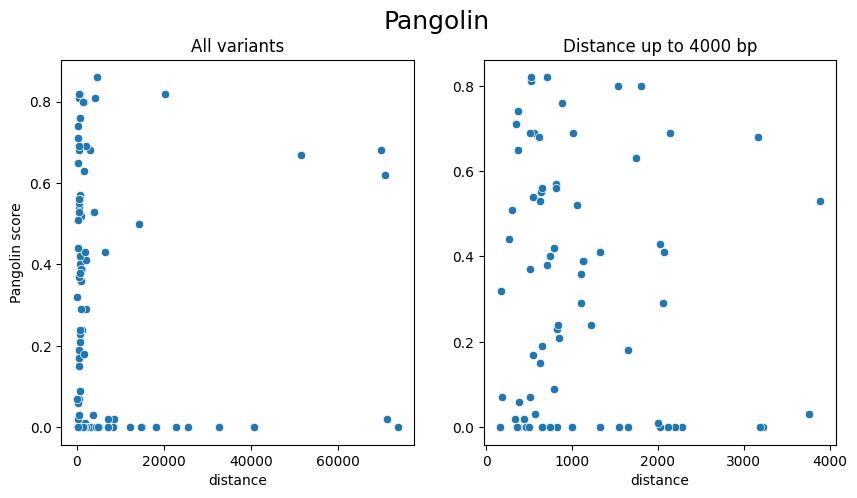

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('Pangolin', fontsize=18)
sns.scatterplot(y=res_103_pathogenic.Pangolin, x=res_103_pathogenic.distance, ax=axes[0])
axes[0].set_title('All variants')
axes[0].set_ylabel('Pangolin score')

sns.scatterplot(y=res_103_pathogenic_short.Pangolin, x=res_103_pathogenic_short.distance, ax=axes[1])
axes[1].set_title('Distance up to 4000 bp')
axes[1].set_ylabel('');

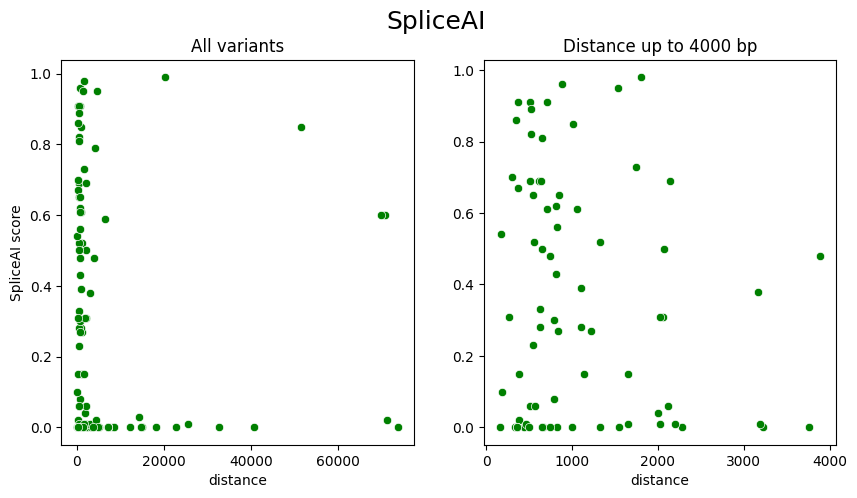

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('SpliceAI', fontsize=18)
sns.scatterplot(y=res_103_pathogenic.SpliceAI, x=res_103_pathogenic.distance, color='g', ax=axes[0])
axes[0].set_title('All variants')
axes[0].set_ylabel('SpliceAI score')

sns.scatterplot(y=res_103_pathogenic_short.SpliceAI, x=res_103_pathogenic_short.distance, color='g', ax=axes[1])
axes[1].set_title('Distance up to 4000 bp')
axes[1].set_ylabel('');

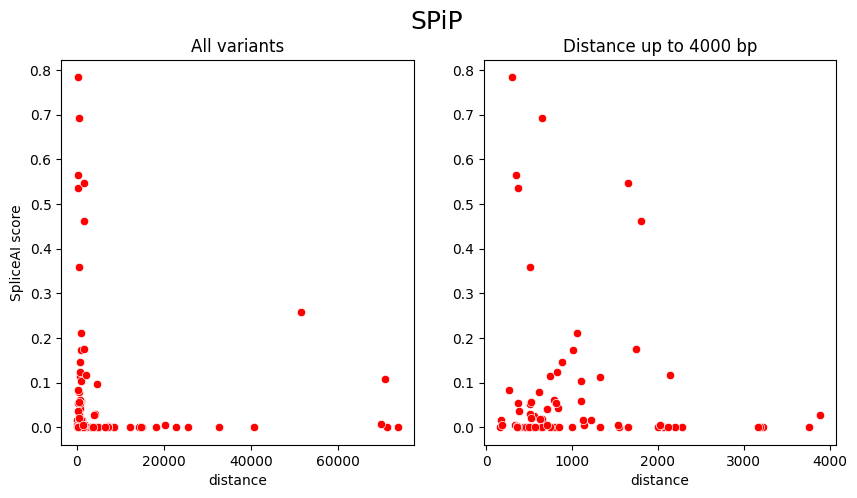

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('SPiP', fontsize=18)
sns.scatterplot(y=res_103_pathogenic.SPiP, x=res_103_pathogenic.distance, color='r', ax=axes[0])
axes[0].set_title('All variants')
axes[0].set_ylabel('SpliceAI score')

sns.scatterplot(y=res_103_pathogenic_short.SPiP, x=res_103_pathogenic_short.distance, color='r', ax=axes[1])
axes[1].set_title('Distance up to 4000 bp')
axes[1].set_ylabel('');

We can see tendency that scores become lower as the distance increase especially in case of SPiP.

But, there are no strong corelation in case of each instrument

In [50]:
res_103_pathogenic['distance'].min()

160

In [54]:
res_103[

160